# Load data

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [52]:
coding = pd.read_csv("coding_9_features.csv")
noncoding = pd.read_csv("noncoding_9_features_diff.csv")

In [53]:
coding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
0,0.3871,0.359435,18,2618,981,981,0.284229,9.588915,0.112385,1
1,0.9340,0.460064,8,939,939,939,0.460470,9.042610,0.137821,1
2,0.9340,0.460064,8,939,939,939,0.460470,9.042610,0.137821,1
3,1.0718,0.699278,302,3465,2535,2535,0.270346,11.870000,0.051948,1
4,1.0718,0.699250,302,3468,2538,2538,0.271500,11.870000,0.051903,1


In [54]:
coding.shape

(111275, 10)

In [55]:
noncoding.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
0,0.5161,0.553539,23,1653,390,390,0.466010,8.557163,0.079855,0
1,0.5317,0.552933,21,1483,402,402,0.428935,8.525573,0.056680,0
2,0.6679,0.580696,10,632,180,180,0.591729,8.961508,0.057143,0
3,0.5273,0.617357,18,507,165,165,0.659118,11.371079,0.059172,0
4,0.6262,0.597692,34,1213,165,165,0.529159,10.728845,0.059406,0


In [56]:
noncoding.shape

(173111, 10)

In [57]:
# taking 111200 sequences from both dataframes
noncoding = noncoding.head(111200)
coding = coding.head(111200)

In [58]:
# combining both dataframes
dataset1 = coding.merge(noncoding, how = "outer")


In [59]:
dataset1.shape

(222400, 10)

In [60]:
dataset1.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
0,0.3871,0.359435,18,2618,981,981,0.284229,9.588915,0.112385,1
1,0.9340,0.460064,8,939,939,939,0.460470,9.042610,0.137821,1
2,0.9340,0.460064,8,939,939,939,0.460470,9.042610,0.137821,1
3,1.0718,0.699278,302,3465,2535,2535,0.270346,11.870000,0.051948,1
4,1.0718,0.699250,302,3468,2538,2538,0.271500,11.870000,0.051903,1


In [61]:
dataset1.tail()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
222395,0.4830,0.494624,7,558,159,159,0.459977,4.953825,0.096774,0
222396,0.5244,0.574233,52,815,183,183,0.418751,9.658154,0.077491,0
222397,0.5020,0.415437,3,881,120,120,0.450101,9.149240,0.129693,0
222398,0.4081,0.373988,18,3706,357,357,0.261959,9.695288,0.111741,0
222399,0.4855,0.492435,28,727,162,162,0.358038,9.196044,0.128099,0


In [62]:
# shuffle the dataset
shuffled_dataset = dataset1.sample(frac=1, random_state = 42)

In [63]:
shuffled_dataset.head()

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
130060,0.4871,0.440096,15,1252,246,246,0.418197,9.973082,0.086331,0
122973,0.4975,0.634871,89,1279,186,186,0.365943,11.686200,0.042254,0
143354,0.3740,0.402494,9,2005,201,201,0.371544,9.831574,0.079341,0
210043,0.4390,0.480164,11,731,141,141,0.427099,7.667375,0.106996,0
106295,1.2011,0.611160,65,1147,681,681,0.424952,10.347965,0.023560,1


In [64]:
shuffled_dataset

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity,coding/noncoding
130060,0.4871,0.440096,15,1252,246,246,0.418197,9.973082,0.086331,0
122973,0.4975,0.634871,89,1279,186,186,0.365943,11.686200,0.042254,0
143354,0.3740,0.402494,9,2005,201,201,0.371544,9.831574,0.079341,0
210043,0.4390,0.480164,11,731,141,141,0.427099,7.667375,0.106996,0
106295,1.2011,0.611160,65,1147,681,681,0.424952,10.347965,0.023560,1
...,...,...,...,...,...,...,...,...,...,...
119879,0.4394,0.467187,4,640,138,138,0.482877,9.163359,0.089202,0
103694,0.6674,0.402305,131,5379,3378,3378,0.282702,9.935884,0.108199,1
131932,0.3939,0.463635,118,5651,330,330,0.332367,9.824224,0.101488,0
146867,0.4794,0.401091,2,733,159,159,0.525984,9.331428,0.098361,0


# Test Train Split (222400)

In [70]:
train, test = train_test_split(shuffled_dataset, test_size=0.2, random_state=42)

In [71]:
train.shape

(177920, 10)

In [72]:
test.shape

(44480, 10)

# Logistic Regression

In [76]:
# Split data into features and target
X = shuffled_dataset.drop("coding/noncoding", axis=1) # Features
Y = shuffled_dataset["coding/noncoding"] # Target

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create logistic regression model and fit to data
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Make predictions on test set
Y_pred = log_reg.predict(X_test)

# Calculate accuracy of model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8544064748201439


### Feature Combination 5

In [367]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['coding/noncoding', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity', 'GC content', 'CpG Islands'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['coding/noncoding', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity', 'GC content', 'CpG Islands'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.846830035971223


### Feature Combination 4

In [365]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['coding/noncoding', 'GC content', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['coding/noncoding', 'GC content', 'Transcript Length', 'Relative Codon Bias', 'Isoelectric Potential', 'Aromaticity'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.846830035971223


## Feature Combination Excluding ORF Ratio

In [361]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop(['coding/noncoding', 'ORF Ratio'], axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop(['coding/noncoding', 'ORF Ratio'], axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8544064748201439


### Feature Combination 2

In [205]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop('coding/noncoding', axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop('coding/noncoding', axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.7975269784172662


### Feature Combination 1

In [224]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop('coding/noncoding', axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop('coding/noncoding', axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8473021582733813


### Mouse Dataset

In [33]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop('coding/noncoding', axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop('coding/noncoding', axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8762310606060606


### Small Dataset

In [263]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop('coding/noncoding', axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop('coding/noncoding', axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8672413793103448


### Large Dataset

In [332]:
from sklearn.linear_model import LogisticRegression

X_train = train.drop('coding/noncoding', axis=1) # Done to seperate the features and the target variable
y_train = train['coding/noncoding']

X_test = test.drop('coding/noncoding', axis=1)
y_test = test['coding/noncoding']

lr = LogisticRegression()

lr.fit(X_train, y_train) # Model Fitting

y_pred = lr.predict(X_test) # Predicting...

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8544064748201439


# Random Forest

### Feature Combination 5

In [311]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.09975269784172662


### Feature Combination 4

In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.09939298561151079


## Feature Combination excluding ORF Ratio

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.09928057553956834


### Feature Combination 2

In [206]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8125


### Feature Combination 1

In [225]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8630620503597123


### Mouse Dataset

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


### Small Dataset

In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8915086206896552


### Large Dataset

In [333]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Creating a random forest classifier with 100 trees

classifier.fit(X_train, y_train) # Training the data..

y_pred = classifier.predict(X_test) # Predictions on the test data..

### Accuracy Calculation ###
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8955260791366907


# K Nearest Neighbours

In [79]:
X = shuffled_dataset.drop("coding/noncoding", axis=1) # Features
Y = shuffled_dataset["coding/noncoding"] # Target

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training set
knn.fit(X_train, Y_train)

# Predict the response for test dataset
Y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

/home/user/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.8333408273381295


# Naive Bayes Classifier

In [82]:
X = shuffled_dataset.drop("coding/noncoding", axis=1) # Features
Y = shuffled_dataset["coding/noncoding"] # Target

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier and fit it to the training data
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

# Predict the target variable on the test set
Y_pred = nb_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7875224820143885


# Support Vector Machine

In [ ]:
X = shuffled_dataset.drop("coding/noncoding", axis=1) # Features
Y = shuffled_dataset["coding/noncoding"] # Target

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# create the SVM model and fit it to the training data
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)

# predict the labels for the test set
Y_pred = clf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

print('Accuracy:', accuracy)

# Gradient Boosting Machines

In [ ]:
X = shuffled_dataset.drop("coding/noncoding", axis=1) # Features
Y = shuffled_dataset["coding/noncoding"] # Target

# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# initialize the model
gbc = GradientBoostingClassifier()

# fit the model on the training data
gbc.fit(X_train, Y_train)

# make predictions on the test data
Y_pred = gbc.predict(X_test)

# Data visualization

In [191]:
train = train.drop("coding/noncoding", axis = 1)  # dropping the label from the train set

In [192]:
train_labels = test["coding/noncoding"].copy()

In [193]:
corr_matrix = train.corr()
corr_matrix

,Fickett Score,GC content,CpG Islands,Transcript Length,ORF Length,ORF Ratio,Relative Codon Bias,Isoelectric Potential,Aromaticity
Fickett Score,1.000000,0.483770,0.215138,-0.055498,0.253705,0.253705,0.240080,-0.103057,-0.374918
GC content,0.483770,1.000000,0.319115,-0.106487,0.023433,0.023433,0.243124,0.047222,-0.635402
CpG Islands,0.215138,0.319115,1.000000,0.681539,0.672430,0.672430,-0.335555,0.109124,-0.131749
Transcript Length,-0.055498,-0.106487,0.681539,1.000000,0.638530,0.638530,-0.412258,0.035888,0.128143
ORF Length,0.253705,0.023433,0.672430,0.638530,1.000000,1.000000,-0.251462,-0.014029,-0.006327
ORF Ratio,0.253705,0.023433,0.672430,0.638530,1.000000,1.000000,-0.251462,-0.014029,-0.006327
Relative Codon Bias,0.240080,0.243124,-0.335555,-0.412258,-0.251462,-0.251462,1.000000,0.008602,-0.191955
Isoelectric Potential,-0.103057,0.047222,0.109124,0.035888,-0.014029,-0.014029,0.008602,1.000000,0.051607
Aromaticity,-0.374918,-0.635402,-0.131749,0.128143,-0.006327,-0.006327,-0.191955,0.051607,1.000000


In [194]:
corr_matrix["Fickett Score"].sort_values(ascending = False) #checking how much each attribute correlates with fickett score

Fickett Score            1.000000
GC content               0.483770
ORF Length               0.253705
ORF Ratio                0.253705
Relative Codon Bias      0.240080
CpG Islands              0.215138
Transcript Length       -0.055498
Isoelectric Potential   -0.103057
Aromaticity             -0.374918
Name: Fickett Score, dtype: float64

In [195]:
corr_matrix["GC content"].sort_values(ascending = False) #checking how much each attribute correlates with GC content

GC content               1.000000
Fickett Score            0.483770
CpG Islands              0.319115
Relative Codon Bias      0.243124
Isoelectric Potential    0.047222
ORF Length               0.023433
ORF Ratio                0.023433
Transcript Length       -0.106487
Aromaticity             -0.635402
Name: GC content, dtype: float64

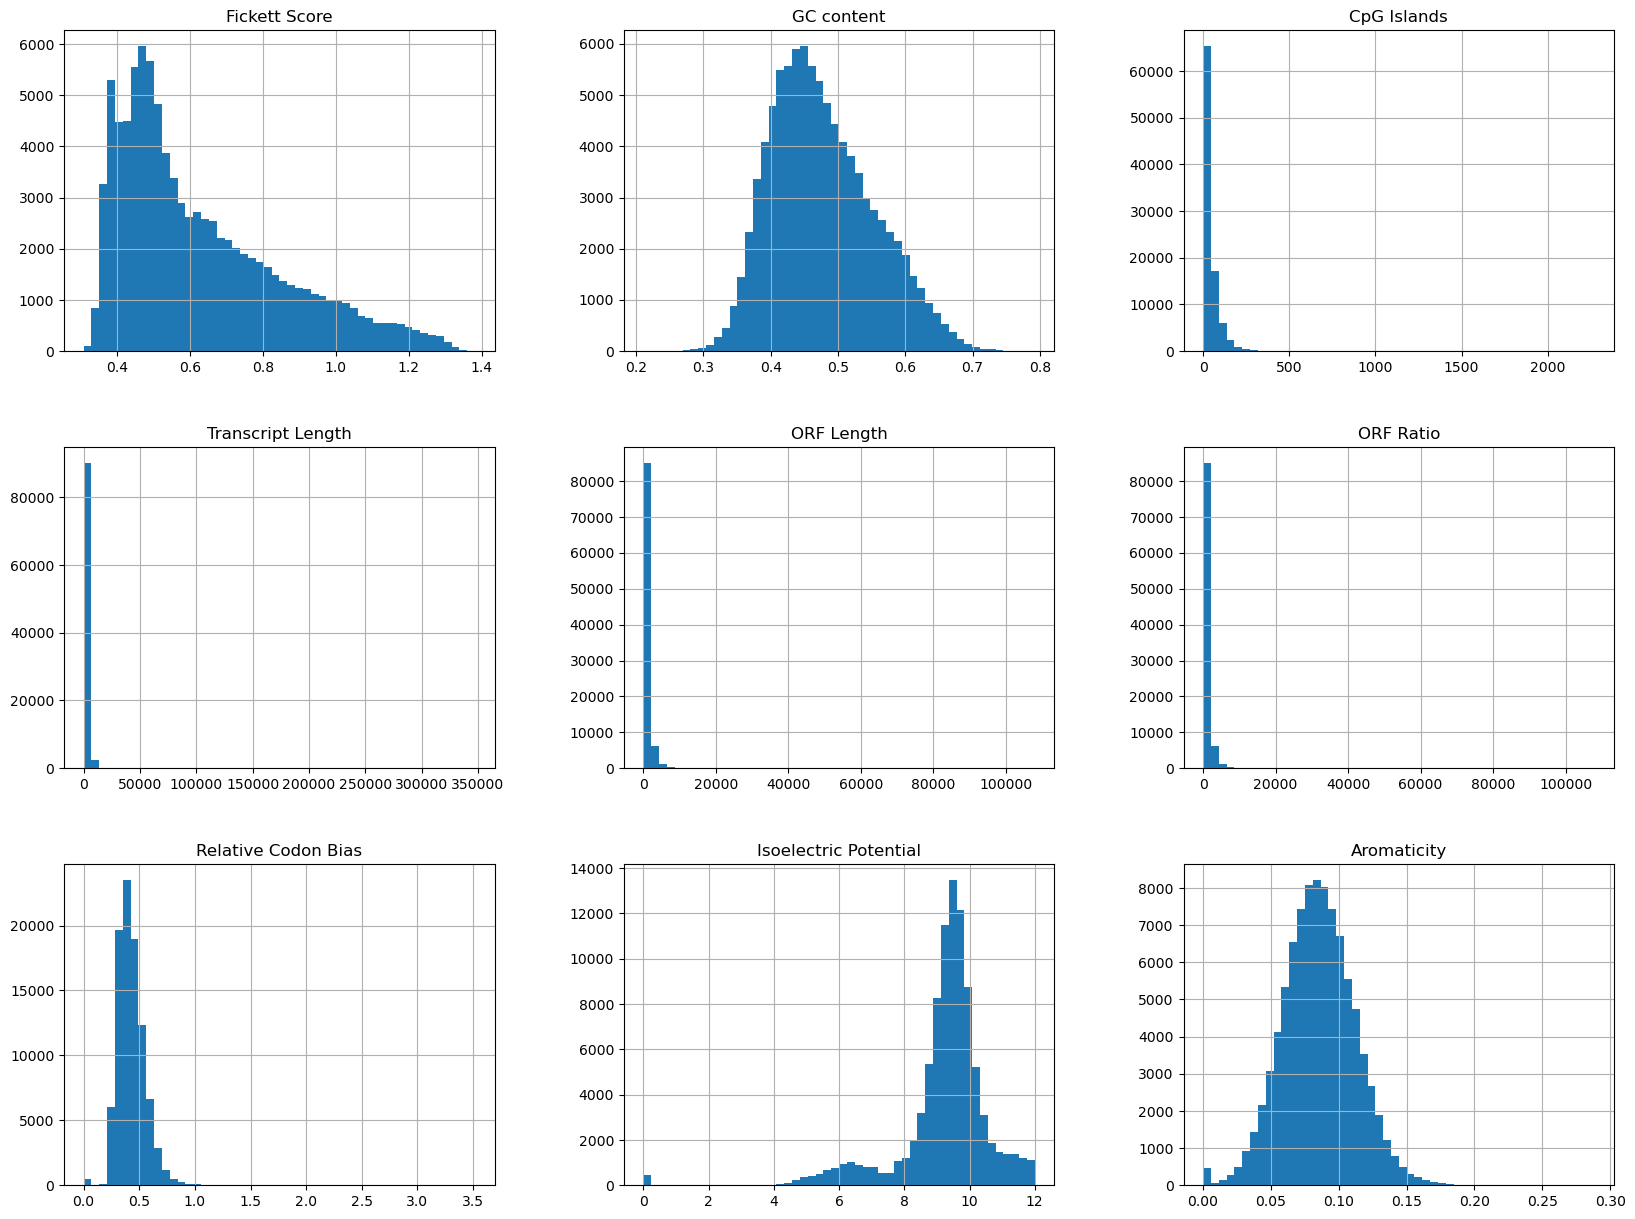

In [196]:
train.hist(bins=50, figsize=(20,15))  #plotting data
plt.show()

<Axes: xlabel='ORF Length'>

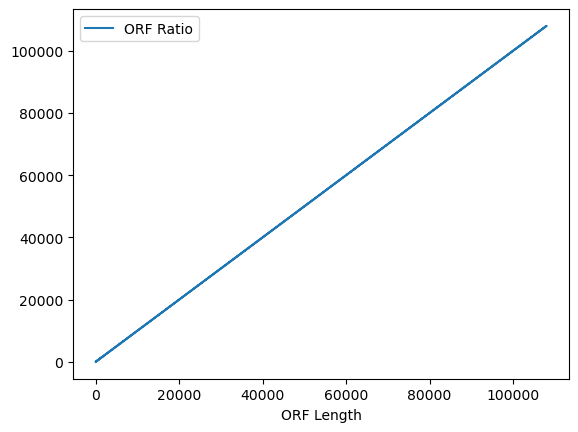

In [197]:
train.plot( x="ORF Length", y="ORF Ratio")  #they are same

<Axes: xlabel='Fickett Score', ylabel='Aromaticity'>

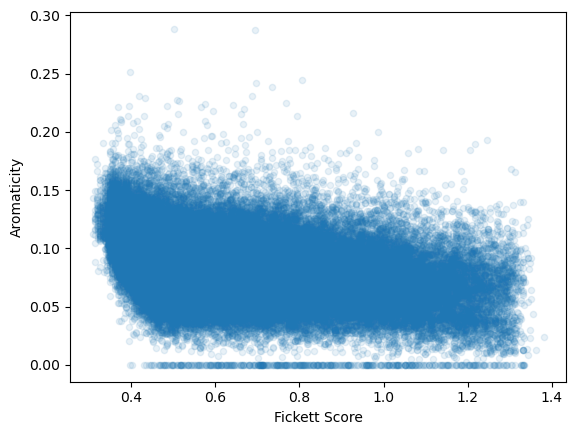

In [198]:
train.plot(kind = "scatter", x="Fickett Score", y="Aromaticity", alpha = 0.1)

<Axes: xlabel='GC content', ylabel='Aromaticity'>

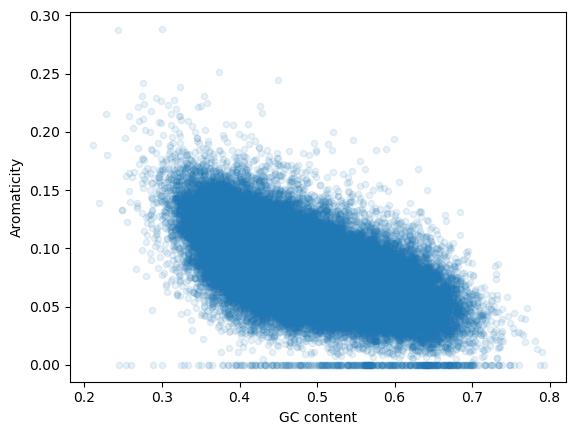

In [199]:
train.plot(kind = "scatter", x="GC content", y="Aromaticity", alpha = 0.1)

# Feature Importance Plot (Random Forest)

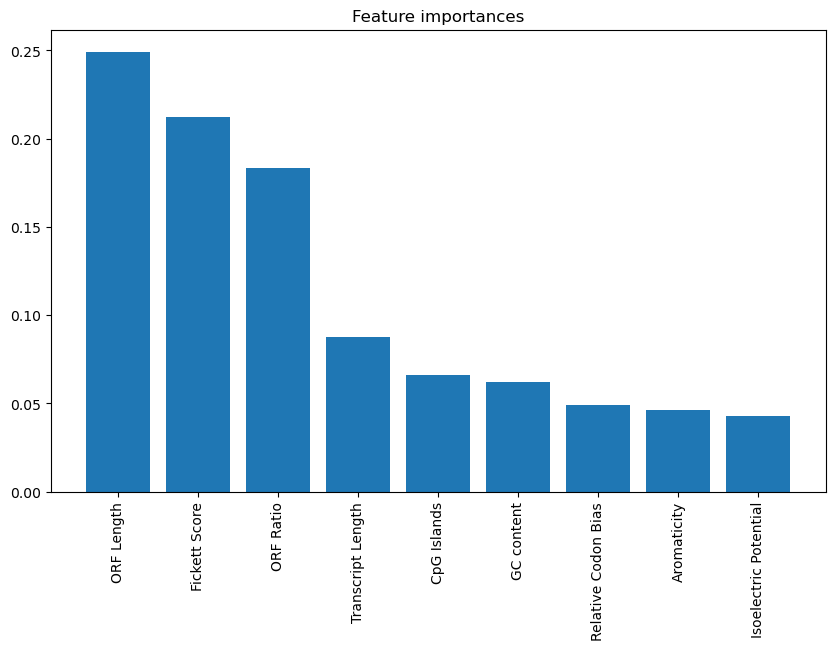

In [265]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a random forest classifier on the training data
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Get feature importances and their indices
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


## Consfusion Matrix, Sensitivity, Specificity

In [337]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() #tn = true negative, fp = false positive, fn = false negative, tp = true positive

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Sensitivity: 0.8714863044454423
Specificity: 0.9196307969383161
